In [1]:
import pandas as pd
import numpy as np
import magic
from matplotlib import pyplot as plt
import seaborn as sns
import importlib
%matplotlib inline
importlib.reload(magic)
import seaborn as sns
from xgboost import XGBClassifier,XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [5]:
csv_file = 'future.csv'
data = pd.read_csv(csv_file)
data['tournament'] = data.tournament_scores/data.num_players
data['effectiveness'] = np.log(data.scores+1)/np.log(data.map_rivers_count/data.num_players)
data['density'] = np.log(data.map_rivers_count)/np.log(data.map_sites_count)
data = data.loc[data.server_name=='Futurer']
data['is_winner'] = data.ranking==0
params = [column for column in data.columns if column.startswith('param')]
major = ['density','map_rivers_count','map_sites_count','map_mines_count','num_players']

D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:32: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


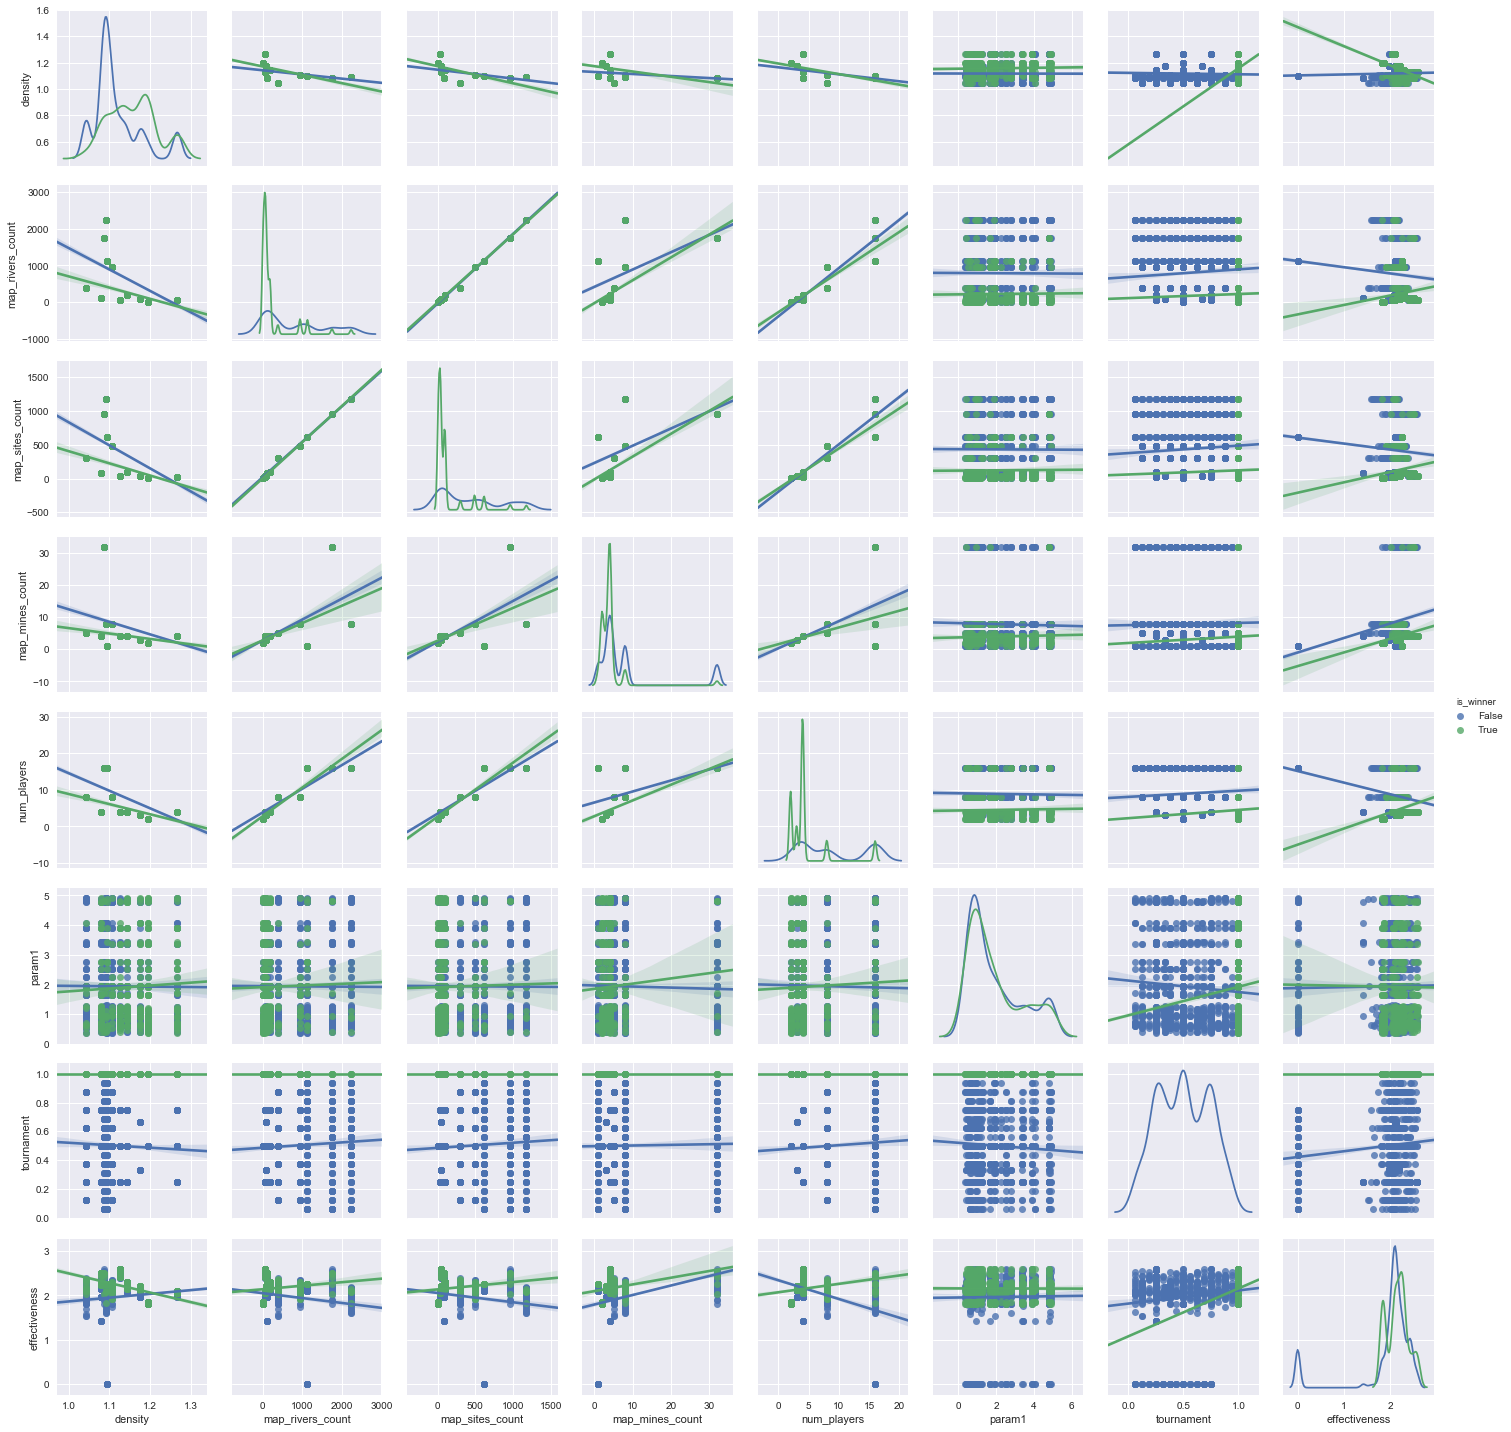

In [12]:
sns.pairplot(data, vars = major + params + ['tournament','effectiveness'],  hue = 'is_winner',
             kind='reg',
            diag_kind='kde',
            plot_kws={ 'scatter_kws' : {'alpha' : 0.8}})

In [14]:

model = XGBRegressor()
print(cross_val_score( model, data[major], data.tournament, scoring='neg_mean_absolute_error'))
print(cross_val_score( model, data[major+params], data.tournament, scoring='neg_mean_absolute_error'))

print(cross_val_score( model, data[major], data.effectiveness, scoring='neg_mean_absolute_error'))
print(cross_val_score( model, data[major+params], data.effectiveness, scoring='neg_mean_absolute_error'))

[-0.25135347 -0.24067857 -0.25665071]
[-0.25001526 -0.24842291 -0.27226907]
[-0.13712014 -0.17889225 -0.18773346]
[-0.16630926 -0.1817479  -0.17652308]


In [ ]:
data.param1.hist()

In [ ]:
t = data.loc[data.map=='boston-sparse.json']
t = data.groupby('name').mean()[['tournament','param1','effectiveness']]
plt.scatter(t.param1,t.tournament)


In [ ]:
numparams = 1
params = ['param' + str(i) for i in range(1,numparams+1)]

test = data.loc[:  , ['game_number','ranking']+params]
test = pd.merge(left=test,right=test,left_on='game_number',right_on='game_number',how='inner')
test = test.loc[test.ranking_x!=test.ranking_y]
test['x_wins'] = np.where(test.ranking_x<test.ranking_y,1,0)

features = [p+"_"+l for p in params for l in ['x','y']]


In [ ]:
grs = test.groupby(['param1_x','param1_y']).mean()['x_wins'].reset_index()
plt.scatter(grs.param1_x,grs.param1_y,c=grs.x_wins)

In [ ]:
model = XGBClassifier()
model.fit(test[features],test.x_wins)

In [ ]:
list(zip(features,model.feature_importances_))


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(XGBClassifier(),test[features],test.x_wins)